<a href="https://colab.research.google.com/github/Isaac-Gathere/DATA-SCIENCE/blob/main/Second_Income_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# read the CSV file into a Pandas dataframe
df = pd.read_csv(r'/content/Second_Income_Data.csv')

# convert the 'Months' column to a datetime object
df['Months'] = pd.to_datetime(df['Months'], format='%b-%y')


In [5]:
# define the independent variables (COVID-related measures)
X = df[['Loans', 'Investment Securities', 'Other Interest Income', 'Deposits', 'Borrowed Funds',
        'Asset Management and Brokerage', 'Capital Markets and Advisory', 'Card and Cash Management',
        'Lending and Deposit Services', 'Residential and commercial mortgage', 'Other Non-interest income',
        'Recapture of credit losses']]

In [6]:
# check for missing values in X
print(pd.isna(X).sum())

Loans                                  0
Investment Securities                  0
Other Interest Income                  0
Deposits                               0
Borrowed Funds                         0
Asset Management and Brokerage         0
Capital Markets and Advisory           0
Card and Cash Management               0
Lending and Deposit Services           0
Residential and commercial mortgage    0
Other Non-interest income              0
Recapture of credit losses             0
dtype: int64


In [7]:
print(df.head())


      Months  Loans  Investment Securities  Other Interest Income  Deposits  \
0 2019-01-01   9257                   1894                    895      1958   
1 2019-02-01  10867                   3093                    982      2051   
2 2019-03-01  13361                   1909                   1050      2765   
3 2019-04-01   6796                   2599                   1095      2737   
4 2019-05-01  14656                   2472                    526      1342   

   Borrowed Funds  Asset Management and Brokerage  \
0            1381                             556   
1            1843                             574   
2            1888                             986   
3            2416                             938   
4            1099                             530   

   Capital Markets and Advisory  Card and Cash Management  \
0                          1479                      1624   
1                          2077                      1374   
2                      

In [8]:
# create a new column for the year
df['year'] = df['Months'].dt.year

In [9]:
# create dummy variables for lockdowns, stimulus, and vaccines
df['lockdown'] = np.where(df['year'] == 2020, 1, 0)
df['stimulus'] = np.where((df['year'] == 2020) & (df['Months'].dt.quarter == 2), 1, 0)
df['vaccines'] = np.where((df['year'] == 2021) & (df['Months'].dt.quarter == 1), 1, 0)


In [11]:
# Drop any rows with missing values
df.dropna(inplace=True)

In [12]:
# perform linear regression with OLS
X = df[['lockdown', 'stimulus', 'vaccines']]
y = df['Gross income from continuing operations']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# print regression summary
print(model.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Gross income from continuing operations   R-squared:                       0.470
Model:                                                 OLS   Adj. R-squared:                  0.434
Method:                                      Least Squares   F-statistic:                     13.00
Date:                                     Wed, 10 May 2023   Prob (F-statistic):           3.26e-06
Time:                                             07:50:05   Log-Likelihood:                -418.77
No. Observations:                                       48   AIC:                             845.5
Df Residuals:                                           44   BIC:                             853.0
Df Model:                                                3                                         
Covariance Type:                                 nonrobust                                         


In [13]:
# print(df.head())

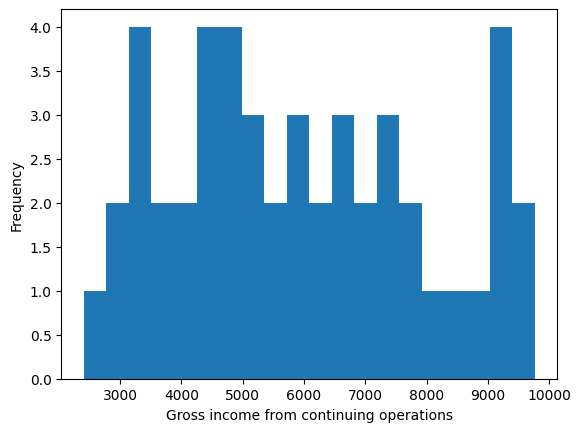

In [14]:
# plot the distribution of the dependent variable
plt.hist(df['Gross income from continuing operations'], bins=20)
plt.xlabel('Gross income from continuing operations')
plt.ylabel('Frequency')
plt.show()


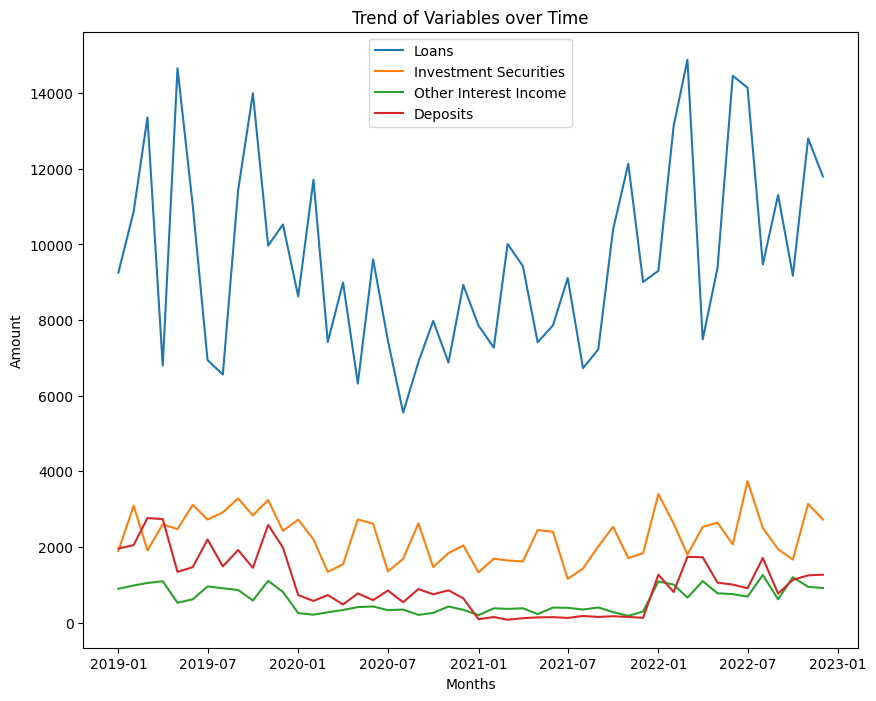

In [15]:
# plot the trend of each variable over time
plt.figure(figsize=(10, 8))
plt.plot(df['Months'], df['Loans'], label='Loans')
plt.plot(df['Months'], df['Investment Securities'], label='Investment Securities')
plt.plot(df['Months'], df['Other Interest Income'], label='Other Interest Income')
plt.plot(df['Months'], df['Deposits'], label='Deposits')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.title('Trend of Variables over Time')
plt.legend()
plt.show()


#### The x-axis shows the time (months) and the y-axis shows the amount of each variable

#### From the chart the trend increased highly in Loans from 2019 to 2023  while in other interest income it was significantly low
#### with the deposits decreasing more in 2021 to 2022

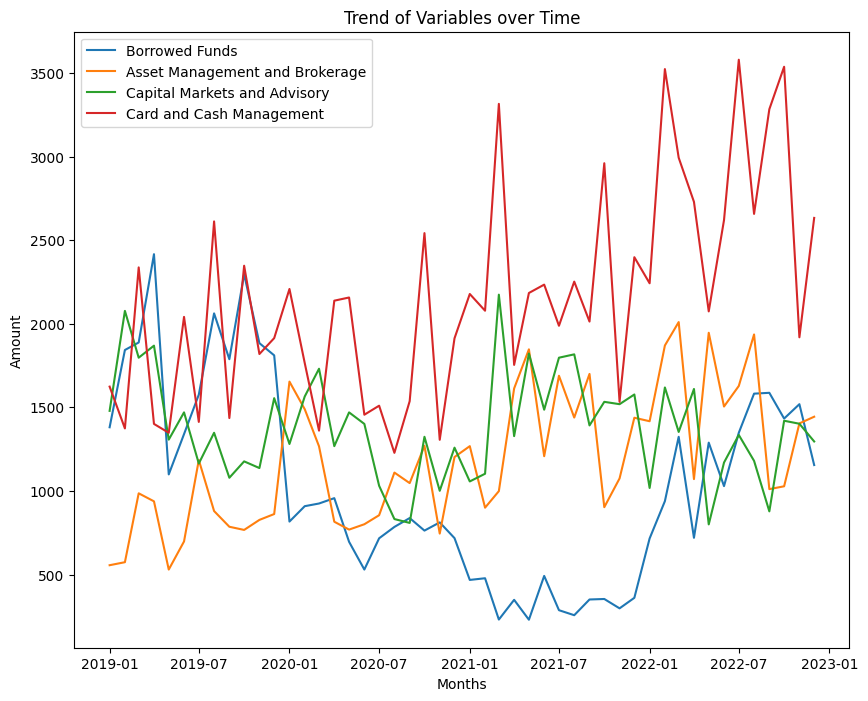

In [16]:
# plot the trend of each variable over time
plt.figure(figsize=(10, 8))
plt.plot(df['Months'], df['Borrowed Funds'], label='Borrowed Funds')
plt.plot(df['Months'], df['Asset Management and Brokerage'], label='Asset Management and Brokerage')
plt.plot(df['Months'], df['Capital Markets and Advisory'], label='Capital Markets and Advisory')
plt.plot(df['Months'], df['Card and Cash Management'], label='Card and Cash Management')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.title('Trend of Variables over Time')
plt.legend()
plt.show()


### The other highest trend was in card and cash management and a significant decrease in borrowed funds between 2020 and 2022

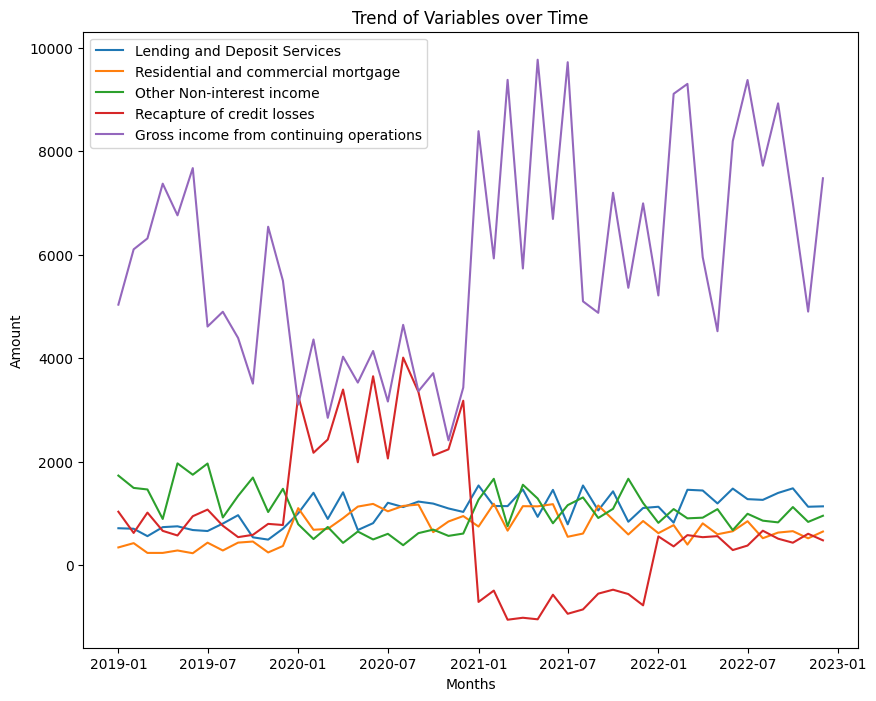

In [17]:
# plot the trend of each variable over time
plt.figure(figsize=(10, 8))
plt.plot(df['Months'], df['Lending and Deposit Services'], label='Lending and Deposit Services')
plt.plot(df['Months'], df['Residential and commercial mortgage'], label='Residential and commercial mortgage')
plt.plot(df['Months'], df['Other Non-interest income'], label='Other Non-interest income')
plt.plot(df['Months'], df['Recapture of credit losses'], label='Recapture of credit losses')
plt.plot(df['Months'], df['Gross income from continuing operations'], label='Gross income from continuing operations')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.title('Trend of Variables over Time')
plt.legend()
plt.show()


### Th Gross income from continuing Operation Increased highly from 2021 to 2022

### there was a decrease in Recapture of Credit losses between 2021 and 2022


In [18]:
loans_by_year = df.groupby('year')['Loans'].sum()
print(loans_by_year)


year
2019    125377
2020     96361
2021    104425
2022    137328
Name: Loans, dtype: int64


In [19]:
highest_loans_year = loans_by_year.idxmax()
print("The year with the highest loans is", int(highest_loans_year))


The year with the highest loans is 2022


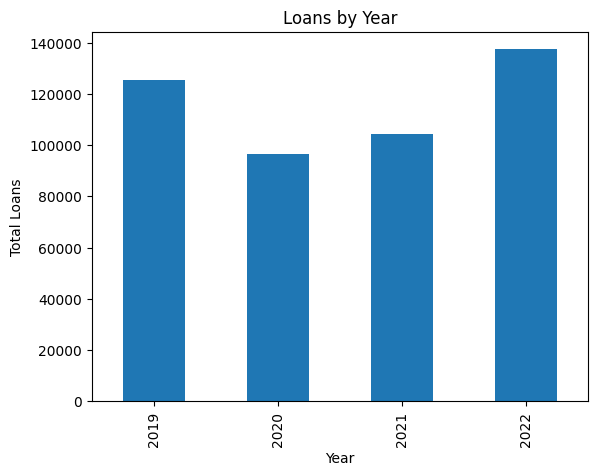

In [20]:
loans_by_year.plot(kind='bar', xlabel='Year', ylabel='Total Loans', title='Loans by Year')
# plot the total loans by year
loans_by_year.plot(kind='bar', xlabel='Year', ylabel='Total Loans', title='Loans by Year')

# show the plot
plt.show()

In [21]:
# create a subset of the data with just the numerical columns
numerical_data = df.select_dtypes(include=[np.number])

# split the data into the dependent variable (Loans) and independent variables
X = numerical_data.drop(['Loans'], axis=1)
y = numerical_data['Loans']

# add a constant to the independent variables for the regression
X = sm.add_constant(X)

# fit the OLS model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Loans   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     2.245
Date:                Wed, 10 May 2023   Prob (F-statistic):             0.0257
Time:                        07:50:36   Log-Likelihood:                -423.69
No. Observations:                  48   AIC:                             883.4
Df Residuals:                      30   BIC:                             917.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

## Explanation
#### The regression model is based on Ordinary Least Squares (OLS) method.
#### The dependent variable is "Loans".
#### The independent variables include: "Investment Securities", "Other Interest Income", "Deposits", "Borrowed Funds", "Asset Management and Brokerage", "Capital Markets and Advisory", "Card and Cash Management", "Lending and Deposit Services", "Residential and commercial mortgage", "Other Non-interest income", "Recapture of credit losses", "Gross income from continuing operations", "Basic earnings per share from continuing operations", "year", "lockdown", "stimulus", and "vaccines".
#### The model statistics show that the R-squared value is 0.56, which indicates that 56% of the variation in loans can be explained by the independent variables.
#### The adjusted R-squared value is 0.31.
#### The F-statistic is 2.245, and the probability associated with it is 0.0257, which indicates that the model is statistically significant.
#### The coefficients for each independent variable are provided, along with their standard errors, t-values, and p-values.
#### The intercept value (constant) is -3.734e+06.
#### The model diagnostics show that the Durbin-Watson statistic is 2.305, indicating no significant autocorrelation, and the Jarque-Bera statistic is 1.248, indicating that the errors are normally distributed.

In [22]:
# create a list of all variable names except for the first (index) and last (total) columns
variable_names = list(df.columns)[1:-1]

# create an empty dictionary to store the results
max_years = {}

# loop through each variable and find the year with the highest value
for var_name in variable_names:
    max_year = df[df[var_name] == df[var_name].max()]['year'].values[0]
    max_years[var_name] = max_year

# print the results
for var_name, max_year in max_years.items():
    print(f"The year with the highest value for {var_name} is {max_year}")


The year with the highest value for Loans is 2022
The year with the highest value for Investment Securities is 2022
The year with the highest value for Other Interest Income is 2022
The year with the highest value for Deposits is 2019
The year with the highest value for Borrowed Funds is 2019
The year with the highest value for Asset Management and Brokerage is 2022
The year with the highest value for Capital Markets and Advisory is 2021
The year with the highest value for Card and Cash Management is 2022
The year with the highest value for Lending and Deposit Services is 2021
The year with the highest value for Residential and commercial mortgage is 2021
The year with the highest value for Other Non-interest income is 2019
The year with the highest value for Recapture of credit losses is 2020
The year with the highest value for Gross income from continuing operations is 2021
The year with the highest value for Basic earnings per share from continuing operations is 2022
The year with t

In [23]:
# Calculate total profits for each year
df['Total Profits'] = df['Gross income from continuing operations'] - df['Other Non-interest income']
profits_by_year = df.groupby('year')['Total Profits'].sum()

# Find the year with the maximum profits
max_profit_year = profits_by_year.idxmax()
max_profit = profits_by_year[max_profit_year]


print(f"The year with the highest profits is {max_profit_year} with a total profit of ${max_profit:,.2f}")


The year with the highest profits is 2022 with a total profit of $76,596.00
